<h1><font color = 'red'> <center>CVEN 5370 GIS Apps in Engineering: Assignment 2</h1>
<h3><font color = 'blue'> <center>Shaseevarajan Sivanantharajah</h3>

**Read data and reproject to same CRS EPSG 3083**

In [4]:
import geopandas as gpd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from shapely.geometry import Point, LineString, Polygon
import os

In [17]:
path = "/home/vu1/Shaseevarajan Sivanantharajah/Assignment 2/Data"
os.chdir(path)

In [37]:
ftexas = "County_Boundaries.shp" 
fwells = "TWDB_Groundwater.shp"
froad = "tl_2019_48_prisecroads.shp"
texas = gpd.read_file(ftexas)
wells = gpd.read_file(fwells)
road = gpd.read_file(froad)

In [38]:
crsp = "epsg:3083"
texasp = texas.to_crs(crsp)
wellsp = wells.to_crs(crsp)
roadp = road.to_crs(crsp)

Text(0.5, 1.0, 'Major Roads and Wells in Texas')

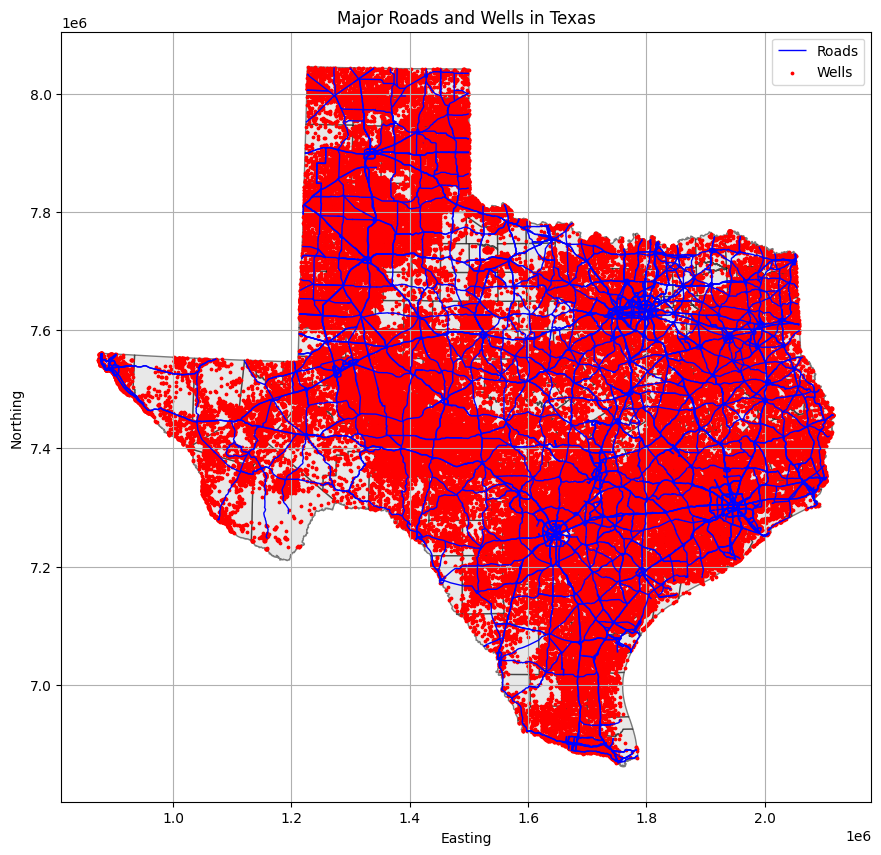

In [47]:
fig,ax = plt.subplots(figsize=(12,10))
roadp.plot(ax=ax,color ='blue', linewidth =1,label = 'Roads')
texasp.plot(ax=ax,color ='lightgrey', edgecolor = 'black', alpha =0.5)
wellsp.plot(ax=ax,color ='red', markersize=3,label = 'Wells')
plt.grid()
plt.xlabel ('Easting')
plt.ylabel ('Northing')
plt.legend()
plt.title("Major Roads and Wells in Texas")

In [48]:
texasp.head()

,CMPTRL_CNT,DPS_CNTY_N,FIPS_ST_CN,TXDOT_CNTY,TXDOT_DIST,CNTY_NM,CNTY_NBR,DIST_NBR,GID,geometry
0,232,232,48463,232,15,Uvalde,232,15,35,"POLYGON ((1548580.758 7218735.914, 1548467.973..."
1,143,143,48285,143,13,Lavaca,143,13,36,"POLYGON ((1802991.121 7283199.932, 1803003.936..."
2,20,20,48039,20,12,Brazoria,20,12,37,"POLYGON ((1955932.13 7285025.412, 1955941.887 ..."
3,241,241,48481,241,13,Wharton,241,13,38,"POLYGON ((1869676.327 7285703.717, 1869702.023..."
4,163,163,48325,163,15,Medina,163,15,39,"POLYGON ((1557003.638 7228370.703, 1556999.535..."


In [67]:
texasp['AreaSQMI']=texasp.area*(0.000621371**2)

In [68]:
texasp.head()

,CMPTRL_CNT,DPS_CNTY_N,FIPS_ST_CN,TXDOT_CNTY,TXDOT_DIST,CNTY_NM,CNTY_NBR,DIST_NBR,GID,geometry,AreaSQMI
0,232,232,48463,232,15,Uvalde,232,15,35,"POLYGON ((1548580.758 7218735.914, 1548467.973...",1564.692024
1,143,143,48285,143,13,Lavaca,143,13,36,"POLYGON ((1802991.121 7283199.932, 1803003.936...",971.074192
2,20,20,48039,20,12,Brazoria,20,12,37,"POLYGON ((1955932.13 7285025.412, 1955941.887 ...",1486.243306
3,241,241,48481,241,13,Wharton,241,13,38,"POLYGON ((1869676.327 7285703.717, 1869702.023...",1094.345787
4,163,163,48325,163,15,Medina,163,15,39,"POLYGON ((1557003.638 7228370.703, 1556999.535...",1339.617299


In [91]:
area = np.sum(texasp.AreaSQMI)
print(area)

267232.25433024624


<h5> Dissolve the Countys in Texas

In [92]:
texasd = texasp.dissolve() #Requires () as it is a method

<function matplotlib.pyplot.show(close=None, block=None)>

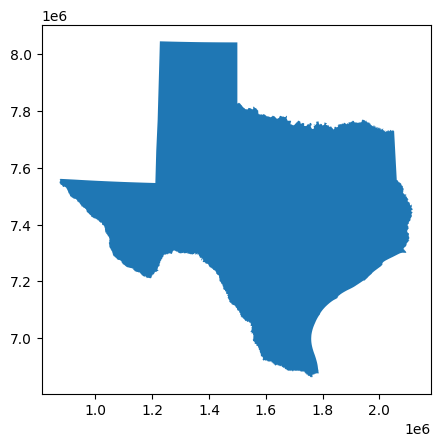

In [93]:
texasd.plot()
plt.show

In [94]:
texasd.head()

,geometry,CMPTRL_CNT,DPS_CNTY_N,FIPS_ST_CN,TXDOT_CNTY,TXDOT_DIST,CNTY_NM,CNTY_NBR,DIST_NBR,GID,AreaSQMI
0,"POLYGON ((1276003.877 7307501.635, 1276010.379...",232,232,48463,232,15,Uvalde,232,15,35,1564.692024


In [95]:
texasd.columns

Index(['geometry', 'CMPTRL_CNT', 'DPS_CNTY_N', 'FIPS_ST_CN', 'TXDOT_CNTY',
       'TXDOT_DIST', 'CNTY_NM', 'CNTY_NBR', 'DIST_NBR', 'GID', 'AreaSQMI'],
      dtype='object')

In [96]:
texasd = texasd.drop(columns=['AreaSQMI'])

In [97]:
texasd.head()

,geometry,CMPTRL_CNT,DPS_CNTY_N,FIPS_ST_CN,TXDOT_CNTY,TXDOT_DIST,CNTY_NM,CNTY_NBR,DIST_NBR,GID
0,"POLYGON ((1276003.877 7307501.635, 1276010.379...",232,232,48463,232,15,Uvalde,232,15,35


In [98]:
texasd['AreaSQMI']=texasd.area*np.power(0.000621371,2)

In [99]:
texasd.head()

,geometry,CMPTRL_CNT,DPS_CNTY_N,FIPS_ST_CN,TXDOT_CNTY,TXDOT_DIST,CNTY_NM,CNTY_NBR,DIST_NBR,GID,AreaSQMI
0,"POLYGON ((1276003.877 7307501.635, 1276010.379...",232,232,48463,232,15,Uvalde,232,15,35,267232.254225


In [104]:
roadp['LengthMI'] = roadp.length*0.0006213712
roadp.head()

,LINEARID,FULLNAME,RTTYP,MTFCC,geometry,LengthMI
0,1102671600066,S Walton Walker Rmp,M,S1200,"LINESTRING (1791293.798 7623070.326, 1791122.4...",0.220021
1,1102671599582,S Walton Walker Rmp,M,S1200,"LINESTRING (1791294.231 7623081.564, 1791073.7...",0.221517
2,110449721117,West S Lp,M,S1200,"LINESTRING (1668852.254 7566582.529, 1668869.5...",0.624275
3,110449719101,W S Lp,M,S1200,"LINESTRING (1668373.606 7566294.178, 1668459.8...",0.347292
4,1106039033336,E S Lp,M,S1200,"LINESTRING (1669708.783 7567107.535, 1669779.6...",1.388956


In [113]:
np.sum(roadp.LengthMI)

np.float64(63284.38092393685)

<h5> Approximate road area in Texas Highways

In [114]:
width = 35 #Roads occupy 75 metersHighways in total for buffer its half
roadsb = roadp.copy()
roadsb['geometry'] = roadsb.geometry.buffer(width)

In [115]:
roadsb.head()

,LINEARID,FULLNAME,RTTYP,MTFCC,geometry,LengthMI
0,1102671600066,S Walton Walker Rmp,M,S1200,"POLYGON ((1791124.277 7623026.222, 1791122.834...",0.220021
1,1102671599582,S Walton Walker Rmp,M,S1200,"POLYGON ((1791074.521 7623041.707, 1791072.581...",0.221517
2,110449721117,West S Lp,M,S1200,"POLYGON ((1668850.606 7566623.114, 1668850.806...",0.624275
3,110449719101,W S Lp,M,S1200,"POLYGON ((1668442.481 7566371.953, 1668588.38 ...",0.347292
4,1106039033336,E S Lp,M,S1200,"POLYGON ((1669761.635 7567180.233, 1669762.734...",1.388956


In [116]:
roadsb['AreaSQMI'] = roadsb.area*np.power(0.0006213712,2)
roadsb.head()

,LINEARID,FULLNAME,RTTYP,MTFCC,geometry,LengthMI,AreaSQMI
0,1102671600066,S Walton Walker Rmp,M,S1200,"POLYGON ((1791124.277 7623026.222, 1791122.834...",0.220021,0.011053
1,1102671599582,S Walton Walker Rmp,M,S1200,"POLYGON ((1791074.521 7623041.707, 1791072.581...",0.221517,0.011118
2,110449721117,West S Lp,M,S1200,"POLYGON ((1668850.606 7566623.114, 1668850.806...",0.624275,0.028637
3,110449719101,W S Lp,M,S1200,"POLYGON ((1668442.481 7566371.953, 1668588.38 ...",0.347292,0.016589
4,1106039033336,E S Lp,M,S1200,"POLYGON ((1669761.635 7567180.233, 1669762.734...",1.388956,0.061897


In [118]:
sum(roadsb.AreaSQMI)

2764.9544684027273

<h5>Find the length per County (Spatial Join)

In [119]:
roadscty = gpd.overlay(roadp,texasp,how ='intersection')

In [122]:
roadscty.columns

Index(['LINEARID', 'FULLNAME', 'RTTYP', 'MTFCC', 'LengthMI', 'CMPTRL_CNT',
       'DPS_CNTY_N', 'FIPS_ST_CN', 'TXDOT_CNTY', 'TXDOT_DIST', 'CNTY_NM',
       'CNTY_NBR', 'DIST_NBR', 'GID', 'AreaSQMI', 'geometry'],
      dtype='object')

In [120]:
roadscty.head()

,LINEARID,FULLNAME,RTTYP,MTFCC,LengthMI,CMPTRL_CNT,DPS_CNTY_N,FIPS_ST_CN,TXDOT_CNTY,TXDOT_DIST,CNTY_NM,CNTY_NBR,DIST_NBR,GID,AreaSQMI,geometry
0,1102671600066,S Walton Walker Rmp,M,S1200,0.220021,57,57,48113,57,18,Dallas,57,18,177,908.412498,"LINESTRING (1791293.798 7623070.326, 1791122.4..."
1,1102671599582,S Walton Walker Rmp,M,S1200,0.221517,57,57,48113,57,18,Dallas,57,18,177,908.412498,"LINESTRING (1791294.231 7623081.564, 1791073.7..."
2,110449721117,West S Lp,M,S1200,0.624275,72,72,48143,73,2,Erath,73,2,149,1087.397913,"LINESTRING (1668852.254 7566582.529, 1668869.5..."
3,110449719101,W S Lp,M,S1200,0.347292,72,72,48143,73,2,Erath,73,2,149,1087.397913,"LINESTRING (1668373.606 7566294.178, 1668459.8..."
4,1106039033336,E S Lp,M,S1200,1.388956,72,72,48143,73,2,Erath,73,2,149,1087.397913,"LINESTRING (1669708.783 7567107.535, 1669779.6..."


In [128]:
roadsctyg = roadscty.groupby('CNTY_NM')['LengthMI'].sum().reset_index()

In [129]:
roadsctyg.head()

,CNTY_NM,LengthMI
0,Anderson,332.251680
1,Andrews,565.221778
2,Angelina,366.663162
3,Aransas,100.591255
4,Archer,322.382896


In [131]:
roadsctyg.sort_values(by='LengthMI',ascending=False)

,CNTY_NM,LengthMI
100,Harris,2861.070723
56,Dallas,2023.644947
219,Tarrant,1775.085937
14,Bexar,1530.842074
69,El Paso,938.478005
...,...,...
31,Camp,55.584974
196,Roberts,53.965410
212,Somervell,53.032941
16,Borden,48.887280


In [135]:
roadsctyg.loc[(roadsctyg)['CNTY_NM']=='Jefferson']

,CNTY_NM,LengthMI
122,Jefferson,709.982566
